In [ ]:
# =========================================================================
# SIMULACIÓN COMPLETA DEL PRINCIPIO DE INCERTIDUMBRE DE HEISENBERG
# Para Jupyter Notebook - Estudiantes de Ingeniería
# Basado en Young & Freedman, Física Universitaria
# =========================================================================

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.widgets import Slider, Button
import scipy.constants as const
from IPython.display import display, HTML, Image, clear_output
from ipywidgets import interact, FloatSlider, IntSlider, Dropdown, VBox, HBox, Output
import warnings
warnings.filterwarnings('ignore')

# Configuración global de matplotlib
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

print("🌊 SIMULACIÓN DEL PRINCIPIO DE INCERTIDUMBRE DE HEISENBERG")
print("="*80)
print("📚 Basado en Young & Freedman, Física Universitaria")
print("🎯 Diseñado para estudiantes de ingeniería")
print("="*80)

# =========================================================================
# CLASE PRINCIPAL DE SIMULACIÓN
# =========================================================================

class HeisenbergSimulator:
    """
    Simulador completo del Principio de Incertidumbre de Heisenberg
    con visualizaciones interactivas y ejemplos físicos
    """
    
    def __init__(self):
        """Inicializar constantes físicas y configuración"""
        # Constantes fundamentales
        self.h = const.h                    # Constante de Planck (J·s)
        self.hbar = const.hbar             # Constante de Planck reducida (J·s)
        self.c = const.c                   # Velocidad de la luz (m/s)
        self.m_e = const.m_e               # Masa del electrón (kg)
        self.m_p = const.m_p               # Masa del protón (kg)
        self.eV = const.eV                 # Electrón-voltio (J)
        self.k_B = const.k                 # Constante de Boltzmann (J/K)
        
        # Mostrar constantes
        self._display_constants()
        
    def _display_constants(self):
        """Mostrar las constantes físicas utilizadas"""
        display(HTML("""
        <div style='background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); 
                    color: white; padding: 20px; border-radius: 10px; margin: 10px 0;'>
        <h3>🔬 Constantes Físicas Utilizadas</h3>
        <table style='color: white; width: 100%;'>
        <tr><td><b>ℏ (Planck reducida):</b></td><td>{:.3e} J·s</td></tr>
        <tr><td><b>Masa del electrón:</b></td><td>{:.3e} kg</td></tr>
        <tr><td><b>Masa del protón:</b></td><td>{:.3e} kg</td></tr>
        <tr><td><b>Velocidad de la luz:</b></td><td>{:.3e} m/s</td></tr>
        <tr><td><b>Electrón-voltio:</b></td><td>{:.3e} J</td></tr>
        </table>
        </div>
        """.format(self.hbar, self.m_e, self.m_p, self.c, self.eV)))

# =========================================================================
# 1. GRÁFICO FUNDAMENTAL (ESTILO YOUNG & FREEDMAN)
# =========================================================================

    def plot_uncertainty_graph(self, interactive=False):
        """
        Crea el gráfico fundamental del principio de incertidumbre
        Réplica exacta del gráfico de Young & Freedman
        """
        if interactive:
            self._interactive_uncertainty_graph()
        else:
            self._static_uncertainty_graph()
    
    def _static_uncertainty_graph(self):
        """Gráfico estático básico"""
        fig, ax = plt.subplots(figsize=(12, 9))
        
        # Datos para la hipérbola ΔxΔp = ℏ
        delta_x = np.logspace(-12, -8, 1000)  # De 1 pm a 10 nm
        delta_p = self.hbar / delta_x
        
        # Convertir a unidades convenientes para visualización
        x_plot = delta_x * 1e12  # pm
        p_plot = delta_p * 1e25  # ×10^-25 kg⋅m/s
        
        # Plotear la hipérbola fundamental
        ax.loglog(x_plot, p_plot, 'g-', linewidth=4, 
                 label=r'$\Delta x \Delta p_x = \hbar$ (Límite mínimo)', zorder=3)
        
        # Región permitida (área sombreada)
        x_fill = np.logspace(-12, -8, 100) * 1e12
        p_min = (self.hbar / (x_fill * 1e-12)) * 1e25
        p_max = p_min * 5  # Límite superior para visualización
        
        ax.fill_between(x_fill, p_min, p_max, alpha=0.3, color='lightblue', 
                       label='Región permitida: $\Delta x \Delta p_x \geq \hbar$', zorder=1)
        
        # Configuración de ejes
        ax.set_xlabel(r'$\Delta x$ (pm)', fontsize=16, fontweight='bold')
        ax.set_ylabel(r'$\Delta p_x$ ($\times 10^{-25}$ kg⋅m/s)', fontsize=16, fontweight='bold')
        ax.set_title('Principio de Incertidumbre de Heisenberg\n' +
                    'Componentes de Posición y Momento', fontsize=18, fontweight='bold', pad=20)
        
        # Anotaciones como en el libro
        ax.annotate('Se permite:\n$\Delta x \Delta p_x \geq \hbar$',
                   xy=(100, 3), xytext=(300, 15),
                   fontsize=14, fontweight='bold', color='darkgreen',
                   bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgreen", alpha=0.8),
                   arrowprops=dict(arrowstyle='->', color='darkgreen', lw=2))
        
        ax.annotate('Es imposible:\n$\Delta x \Delta p_x < \hbar$',
                   xy=(2000, 0.3), xytext=(1000, 0.6),
                   fontsize=14, fontweight='bold', color='darkred',
                   bbox=dict(boxstyle="round,pad=0.5", facecolor="lightcoral", alpha=0.8),
                   arrowprops=dict(arrowstyle='->', color='darkred', lw=2))
        
        # Mejorar la apariencia
        ax.grid(True, alpha=0.3, which='both')
        ax.legend(fontsize=14, loc='upper right')
        ax.set_xlim(1, 10000)
        ax.set_ylim(0.1, 100)
        
        plt.tight_layout()
        plt.show()
        
        # Información adicional
        display(HTML("""
        <div style='background: #e8f5e8; border: 2px solid #4caf50; 
                    border-radius: 8px; padding: 15px; margin: 10px 0;'>
        <h4>📊 Interpretación del Gráfico:</h4>
        <ul>
        <li><b>Hipérbola verde:</b> Límite fundamental ΔxΔp = ℏ</li>
        <li><b>Región azul:</b> Estados cuánticos permitidos</li>
        <li><b>Región blanca:</b> Estados prohibidos por las leyes cuánticas</li>
        <li><b>Escalas logarítmicas:</b> Permiten visualizar el amplio rango de valores</li>
        </ul>
        </div>
        """))

# =========================================================================
# 2. SIMULACIÓN INTERACTIVA CON WIDGETS
# =========================================================================

    def interactive_simulation(self):
        """Simulación interactiva usando ipywidgets"""
        display(HTML("<h2 style='color: #667eea;'>🎛️ Simulación Interactiva</h2>"))
        
        @interact(
            log_delta_x=FloatSlider(
                value=-10, min=-12, max=-8, step=0.1,
                description='log₁₀(Δx/m):', style={'description_width': 'initial'}
            ),
            particle=Dropdown(
                options=[('Electrón', 'm_e'), ('Protón', 'm_p'), ('Personalizado', 'custom')],
                value='m_e', description='Partícula:'
            ),
            custom_mass=FloatSlider(
                value=9.11e-31, min=1e-32, max=1e-25, step=1e-32,
                description='Masa (kg):', style={'description_width': 'initial'},
                readout_format='.2e'
            )
        )
        def update_calculation(log_delta_x, particle, custom_mass):
            # Calcular valores
            delta_x = 10**log_delta_x
            delta_p_min = self.hbar / (2 * delta_x)
            
            # Seleccionar masa
            if particle == 'm_e':
                mass = self.m_e
                particle_name = "Electrón"
            elif particle == 'm_p':
                mass = self.m_p
                particle_name = "Protón"
            else:
                mass = custom_mass
                particle_name = "Partícula personalizada"
            
            delta_v_min = delta_p_min / mass
            
            # Mostrar resultados
            results_html = f"""
            <div style='background: linear-gradient(135deg, #f093fb 0%, #f5576c 100%); 
                        color: white; padding: 20px; border-radius: 10px; margin: 10px 0;'>
            <h3>📈 Resultados del Cálculo</h3>
            <table style='color: white; width: 100%; font-size: 14px;'>
            <tr><td><b>Partícula:</b></td><td>{particle_name}</td></tr>
            <tr><td><b>Masa:</b></td><td>{mass:.2e} kg</td></tr>
            <tr><td><b>Δx:</b></td><td>{delta_x:.2e} m</td></tr>
            <tr><td><b>Δp mínimo:</b></td><td>{delta_p_min:.2e} kg⋅m/s</td></tr>
            <tr><td><b>Δv mínimo:</b></td><td>{delta_v_min:.2e} m/s</td></tr>
            """
            
            if delta_v_min > 1000:
                results_html += f"<tr><td><b>Δv mínimo:</b></td><td>{delta_v_min/1000:.1f} km/s</td></tr>"
            
            # Agregar contexto físico
            if delta_x >= 1e-10:
                context = "🔬 Escala atómica - Efectos cuánticos significativos"
            elif delta_x >= 1e-15:
                context = "⚛️ Escala nuclear - Efectos cuánticos dominantes"
            else:
                context = "🌌 Escala sub-nuclear - Régimen de alta energía"
            
            results_html += f"<tr><td><b>Contexto:</b></td><td>{context}</td></tr>"
            results_html += "</table></div>"
            
            display(HTML(results_html))
            
            # Crear gráfico dinámico
            self._plot_dynamic_point(delta_x, delta_p_min)
    
    def _plot_dynamic_point(self, delta_x_current, delta_p_current):
        """Grafica el punto actual en el diagrama de incertidumbre"""
        fig, ax = plt.subplots(figsize=(10, 6))
        
        # Hipérbola de referencia
        delta_x = np.logspace(-12, -8, 1000)
        delta_p = self.hbar / delta_x
        
        ax.loglog(delta_x * 1e12, delta_p * 1e25, 'g-', linewidth=3, 
                 label=r'$\Delta x \Delta p = \hbar$')
        
        # Punto actual
        ax.loglog([delta_x_current * 1e12], [delta_p_current * 1e25], 
                 'ro', markersize=12, label='Punto actual', zorder=5)
        
        # Configuración
        ax.set_xlabel(r'$\Delta x$ (pm)')
        ax.set_ylabel(r'$\Delta p$ ($\times 10^{-25}$ kg⋅m/s)')
        ax.set_title('Posición Actual en el Diagrama de Incertidumbre')
        ax.grid(True, alpha=0.3)
        ax.legend()
        
        plt.tight_layout()
        plt.show()

# =========================================================================
# 3. EJEMPLOS FÍSICOS CALCULADOS
# =========================================================================

    def physical_examples(self):
        """Calcula y muestra ejemplos físicos detallados"""
        display(HTML("<h2 style='color: #667eea;'>🔬 Ejemplos Físicos Calculados</h2>"))
        
        examples = [
            {
                'name': 'Electrón en átomo de hidrógeno',
                'delta_x': 0.529e-10,  # Radio de Bohr
                'mass': self.m_e,
                'description': 'Radio de Bohr (estado fundamental)',
                'context': 'El electrón está "localizado" en el orbital 1s',
                'color': '#FF6B6B'
            },
            {
                'name': 'Electrón en punto cuántico de 10 nm',
                'delta_x': 10e-9,
                'mass': self.m_e,
                'description': 'Nanotecnología - confinamiento cuántico',
                'context': 'Aplicación en LEDs y células solares',
                'color': '#4ECDC4'
            },
            {
                'name': 'Electrón en transistor de 5 nm',
                'delta_x': 5e-9,
                'mass': self.m_e,
                'description': 'Tecnología de semiconductores actual',
                'context': 'Límite de miniaturización por efectos cuánticos',
                'color': '#45B7D1'
            },
            {
                'name': 'Protón en núcleo atómico',
                'delta_x': 1e-15,  # 1 femtómetro
                'mass': self.m_p,
                'description': 'Escala nuclear',
                'context': 'Confinamiento en el núcleo atómico',
                'color': '#96CEB4'
            },
            {
                'name': 'Molécula en trampa óptica',
                'delta_x': 100e-9,  # 100 nm
                'mass': 100 * self.m_p,  # ~100 uma
                'description': 'Experimentos de física atómica',
                'context': 'Manipulación de átomos individuales',
                'color': '#FECA57'
            },
            {
                'name': 'Pelota de ping-pong (comparación)',
                'delta_x': 1e-3,  # 1 mm de precisión
                'mass': 2.7e-3,  # 2.7 gramos
                'description': 'Objeto macroscópico',
                'context': 'Límite clásico - efectos cuánticos despreciables',
                'color': '#FF9FF3'
            }
        ]
        
        # Crear tabla de resultados
        results_data = []
        for example in examples:
            delta_p_min = self.hbar / (2 * example['delta_x'])
            delta_v_min = delta_p_min / example['mass']
            
            results_data.append({
                'name': example['name'],
                'delta_x': example['delta_x'],
                'delta_p': delta_p_min,
                'delta_v': delta_v_min,
                'description': example['description'],
                'context': example['context'],
                'color': example['color']
            })
        
        # Mostrar resultados en formato HTML mejorado
        html_table = """
        <div style='overflow-x: auto;'>
        <table style='width: 100%; border-collapse: collapse; margin: 20px 0;'>
        <thead style='background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); color: white;'>
        <tr>
        <th style='padding: 12px; border: 1px solid #ddd;'>Sistema Físico</th>
        <th style='padding: 12px; border: 1px solid #ddd;'>Δx (m)</th>
        <th style='padding: 12px; border: 1px solid #ddd;'>Δp (kg⋅m/s)</th>
        <th style='padding: 12px; border: 1px solid #ddd;'>Δv (m/s)</th>
        <th style='padding: 12px; border: 1px solid #ddd;'>Contexto</th>
        </tr>
        </thead>
        <tbody>
        """
        
        for i, result in enumerate(results_data):
            bg_color = result['color'] + '20'  # Agregar transparencia
            velocity_str = f"{result['delta_v']:.2e}"
            if result['delta_v'] > 1000:
                velocity_str += f" ({result['delta_v']/1000:.1f} km/s)"
            
            html_table += f"""
            <tr style='background-color: {bg_color};'>
            <td style='padding: 12px; border: 1px solid #ddd;'>
                <b>{result['name']}</b><br>
                <small>{result['description']}</small>
            </td>
            <td style='padding: 12px; border: 1px solid #ddd;'>{result['delta_x']:.2e}</td>
            <td style='padding: 12px; border: 1px solid #ddd;'>{result['delta_p']:.2e}</td>
            <td style='padding: 12px; border: 1px solid #ddd;'>{velocity_str}</td>
            <td style='padding: 12px; border: 1px solid #ddd;'>{result['context']}</td>
            </tr>
            """
        
        html_table += "</tbody></table></div>"
        display(HTML(html_table))
        
        # Crear gráfico comparativo
        self._plot_examples_comparison(results_data)
    
    def _plot_examples_comparison(self, results_data):
        """Gráfico comparativo de todos los ejemplos"""
        fig, ax = plt.subplots(figsize=(14, 10))
        
        # Hipérbola de referencia
        delta_x = np.logspace(-16, -2, 1000)
        delta_p = self.hbar / delta_x
        ax.loglog(delta_x, delta_p, 'k--', linewidth=2, alpha=0.5, 
                 label=r'$\Delta x \Delta p = \hbar$')
        
        # Plotear ejemplos
        for result in results_data:
            ax.loglog([result['delta_x']], [result['delta_p']], 'o', 
                     markersize=12, color=result['color'], 
                     label=result['name'], alpha=0.8)
        
        # Configuración
        ax.set_xlabel('Δx (m)', fontsize=14, fontweight='bold')
        ax.set_ylabel('Δp (kg⋅m/s)', fontsize=14, fontweight='bold')
        ax.set_title('Comparación de Sistemas Físicos en el Diagrama de Incertidumbre', 
                    fontsize=16, fontweight='bold')
        ax.grid(True, alpha=0.3)
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        
        # Agregar regiones de interés
        ax.axvspan(1e-12, 1e-9, alpha=0.1, color='blue', 
                  label='Escala nanométrica')
        ax.axvspan(1e-16, 1e-12, alpha=0.1, color='red', 
                  label='Escala nuclear')
        
        plt.tight_layout()
        plt.show()

# =========================================================================
# 4. SIMULACIÓN DE PAQUETES DE ONDAS
# =========================================================================

    def wave_packet_simulation(self):
        """Simulación de paquetes de ondas cuánticos"""
        display(HTML("<h2 style='color: #667eea;'>🌊 Simulación de Paquetes de Ondas</h2>"))
        
        @interact(
            sigma_x=FloatSlider(
                value=1.0, min=0.5, max=3.0, step=0.1,
                description='Anchura σₓ:', style={'description_width': 'initial'}
            ),
            k0=FloatSlider(
                value=5.0, min=1.0, max=10.0, step=0.5,
                description='Momento k₀:', style={'description_width': 'initial'}
            ),
            show_uncertainty=Dropdown(
                options=[('Mostrar', True), ('Ocultar', False)],
                value=True, description='Barras de error:'
            )
        )
        def update_wave_packet(sigma_x, k0, show_uncertainty):
            self._plot_wave_packet(sigma_x, k0, show_uncertainty)
    
    def _plot_wave_packet(self, sigma_x, k0, show_uncertainty):
        """Grafica paquetes de ondas en posición y momento"""
        x = np.linspace(-10, 10, 1000)
        k = np.linspace(-15, 15, 1000)
        
        # Paquete de ondas en posición (Gaussiano)
        psi_x = np.exp(-(x**2)/(2*sigma_x**2)) * np.exp(1j*k0*x)
        prob_x = np.abs(psi_x)**2
        prob_x = prob_x / np.trapz(prob_x, x)  # Normalizar
        
        # Paquete de ondas en momento (Transformada de Fourier)
        sigma_k = 1/(2*sigma_x)  # Relación de incertidumbre
        prob_k = np.exp(-(k-k0)**2/(2*sigma_k**2))
        prob_k = prob_k / np.trapz(prob_k, k)  # Normalizar
        
        # Calcular incertidumbres
        delta_x_calc = sigma_x
        delta_k_calc = sigma_k
        product = delta_x_calc * delta_k_calc
        
        # Crear gráficos
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
        
        # Gráfico 1: Posición
        ax1.plot(x, prob_x, 'b-', linewidth=3, label='|ψ(x)|²')
        ax1.fill_between(x, prob_x, alpha=0.3, color='blue')
        
        if show_uncertainty:
            x_mean = np.trapz(x * prob_x, x)
            ax1.axvspan(x_mean - delta_x_calc, x_mean + delta_x_calc, 
                       alpha=0.2, color='red', label=f'Δx = {delta_x_calc:.2f}')
        
        ax1.set_xlabel('Posición x')
        ax1.set_ylabel('Densidad de Probabilidad')
        ax1.set_title('Paquete de Ondas en Posición')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Gráfico 2: Momento
        ax2.plot(k, prob_k, 'r-', linewidth=3, label='|ψ(k)|²')
        ax2.fill_between(k, prob_k, alpha=0.3, color='red')
        
        if show_uncertainty:
            ax2.axvspan(k0 - delta_k_calc, k0 + delta_k_calc, 
                       alpha=0.2, color='blue', label=f'Δk = {delta_k_calc:.2f}')
        
        ax2.set_xlabel('Momento k')
        ax2.set_ylabel('Densidad de Probabilidad')
        ax2.set_title('Paquete de Ondas en Momento')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        # Gráfico 3: Relación de incertidumbre
        ax3.text(0.1, 0.8, f'σₓ = {sigma_x:.2f}', transform=ax3.transAxes, 
                fontsize=14, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))
        ax3.text(0.1, 0.7, f'σₖ = {delta_k_calc:.2f}', transform=ax3.transAxes, 
                fontsize=14, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral"))
        ax3.text(0.1, 0.6, f'σₓ × σₖ = {product:.2f}', transform=ax3.transAxes, 
                fontsize=14, fontweight='bold', 
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen"))
        ax3.text(0.1, 0.5, f'Límite cuántico = 0.5', transform=ax3.transAxes, 
                fontsize=14, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow"))
        
        # Indicador visual del cumplimiento
        if product >= 0.5:
            status = "✅ Cumple el principio"
            color = "lightgreen"
        else:
            status = "❌ Viola el principio"
            color = "lightcoral"
        
        ax3.text(0.1, 0.3, status, transform=ax3.transAxes, 
                fontsize=14, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor=color))
        
        ax3.set_xlim(0, 1)
        ax3.set_ylim(0, 1)
        ax3.set_title('Verificación del Principio')
        ax3.axis('off')
        
        plt.tight_layout()
        plt.show()

# =========================================================================
# 5. APLICACIONES EN INGENIERÍA
# =========================================================================

    def engineering_applications(self):
        """Muestra aplicaciones específicas en ingeniería"""
        display(HTML("<h2 style='color: #667eea;'>⚙️ Aplicaciones en Ingeniería</h2>"))
        
        applications = [
            {
                'title': 'Transistores de Efecto Túnel',
                'description': 'El principio de incertidumbre permite el efecto túnel cuántico',
                'example': 'Transistores de tunelización resonante (RTD)',
                'impact': 'Dispositivos de alta velocidad y baja potencia',
                'calculation': self._tunnel_transistor_example
            },
            {
                'title': 'Microscopía de Efecto Túnel (STM)',
                'description': 'Resolución atómica mediante tunelización de electrones',
                'example': 'Imaging de superficies a escala atómica',
                'impact': 'Caracterización de materiales nanoestructurados',
                'calculation': self._stm_example
            },
            {
                'title': 'LEDs y Láseres Cuánticos',
                'description': 'Ancho de línea natural limitado por incertidumbre',
                'example': 'Ancho espectral mínimo en emisión de luz',
                'impact': 'Límites fundamentales en coherencia óptica',
                'calculation': self._led_linewidth_example
            },
            {
                'title': 'Computación Cuántica',
                'description': 'Manipulación coherente de estados cuánticos',
                'example': 'Qubits basados en estados de superposición',
                'impact': 'Algoritmos cuánticos y criptografía',
                'calculation': self._quantum_computing_example
            }
        ]
        
        # Interfaz interactiva para seleccionar aplicación
        @interact(
            application=Dropdown(
                options=[(app['title'], i) for i, app in enumerate(applications)],
                description='Aplicación:'
            )
        )
        def show_application(application):
            app = applications[application]
            
            # Mostrar información
            # Mostrar información
            display(HTML(f"""
            <div style='background: linear-gradient(135deg, #84fab0 0%, #8fd3f4 100%); 
                        color: #2c3e50; padding: 20px; border-radius: 10px; margin: 10px 0;'>
            <h3>🔧 {app['title']}</h3>
            <p><b>Descripción:</b> {app['description']}</p>
            <p><b>Ejemplo:</b> {app['example']}</p>
            <p><b>Impacto:</b> {app['impact']}</p>
            </div>
            """))
            
            # Ejecutar cálculo específico
            app['calculation']()
    
    def _tunnel_transistor_example(self):
        """Ejemplo de transistor de efecto túnel"""
        display(HTML("<h4>📊 Cálculo: Probabilidad de Tunelización</h4>"))
        
        # Parámetros típicos
        barrier_width = 2e-9  # 2 nm
        barrier_height = 1.0 * const.eV  # 1 eV
        electron_energy = 0.5 * const.eV  # 0.5 eV
        
        # Coeficiente de decaimiento
        kappa = np.sqrt(2 * const.m_e * (barrier_height - electron_energy)) / const.hbar
        
        # Probabilidad de transmisión (aproximación)
        transmission = np.exp(-2 * kappa * barrier_width)
        
        display(HTML(f"""
        <div style='background: #fff3cd; border: 1px solid #ffc107; 
                    border-radius: 8px; padding: 15px; margin: 10px 0;'>
        <h5>Parámetros del Transistor:</h5>
        <ul>
        <li>Ancho de barrera: {barrier_width*1e9:.1f} nm</li>
        <li>Altura de barrera: {barrier_height/const.eV:.1f} eV</li>
        <li>Energía del electrón: {electron_energy/const.eV:.1f} eV</li>
        <li>Coeficiente κ: {kappa*1e-10:.2f} × 10¹⁰ m⁻¹</li>
        <li><b>Probabilidad de transmisión: {transmission:.2e}</b></li>
        </ul>
        <p><b>Conclusión:</b> Aunque la probabilidad es pequeña, es suficiente para 
        crear corrientes mesurables en dispositivos nanométricos.</p>
        </div>
        """))
    
    def _stm_example(self):
        """Ejemplo de microscopía de efecto túnel"""
        display(HTML("<h4>🔬 Cálculo: Resolución del STM</h4>"))
        
        # Parámetros típicos del STM
        tip_sample_distance = 0.5e-9  # 0.5 nm
        work_function = 4.0 * const.eV  # 4 eV (típico para metales)
        bias_voltage = 0.1  # 0.1 V
        
        # Coeficiente de decaimiento
        kappa_stm = np.sqrt(2 * const.m_e * work_function) / const.hbar
        
        # Corriente de túnel (proporcional a)
        tunnel_current_factor = np.exp(-2 * kappa_stm * tip_sample_distance)
        
        # Resolución lateral (limitada por el principio de incertidumbre)
        lateral_resolution = const.hbar / np.sqrt(2 * const.m_e * work_function)
        
        display(HTML(f"""
        <div style='background: #e3f2fd; border: 1px solid #2196F3; 
                    border-radius: 8px; padding: 15px; margin: 10px 0;'>
        <h5>Parámetros del STM:</h5>
        <ul>
        <li>Distancia punta-muestra: {tip_sample_distance*1e9:.1f} nm</li>
        <li>Función trabajo: {work_function/const.eV:.1f} eV</li>
        <li>Voltaje de bias: {bias_voltage:.1f} V</li>
        <li>Factor de corriente túnel: {tunnel_current_factor:.2e}</li>
        <li><b>Resolución lateral: {lateral_resolution*1e12:.1f} pm</b></li>
        </ul>
        <p><b>Conclusión:</b> La resolución atómica del STM está fundamentalmente 
        limitada por el principio de incertidumbre.</p>
        </div>
        """))
    
    def _led_linewidth_example(self):
        """Ejemplo de ancho de línea en LEDs"""
        display(HTML("<h4>💡 Cálculo: Ancho de Línea Natural</h4>"))
        
        # Parámetros típicos
        lifetime = 1e-9  # 1 ns (tiempo de vida del estado excitado)
        photon_energy = 2.0 * const.eV  # 2 eV (LED rojo)
        frequency = photon_energy / const.h
        
        # Ancho de línea natural (limitado por incertidumbre)
        delta_E = const.hbar / (2 * lifetime)
        delta_freq = delta_E / const.h
        relative_linewidth = delta_freq / frequency
        
        # Longitud de onda
        wavelength = const.c / frequency
        delta_lambda = (const.c / frequency**2) * delta_freq
        
        display(HTML(f"""
        <div style='background: #f3e5f5; border: 1px solid #9c27b0; 
                    border-radius: 8px; padding: 15px; margin: 10px 0;'>
        <h5>Parámetros del LED:</h5>
        <ul>
        <li>Tiempo de vida: {lifetime*1e9:.1f} ns</li>
        <li>Energía del fotón: {photon_energy/const.eV:.1f} eV</li>
        <li>Frecuencia: {frequency*1e-14:.1f} × 10¹⁴ Hz</li>
        <li>Longitud de onda: {wavelength*1e9:.0f} nm</li>
        <li><b>Ancho de línea ΔE: {delta_E/const.eV*1e6:.1f} µeV</b></li>
        <li><b>Ancho de línea Δλ: {delta_lambda*1e12:.2f} pm</b></li>
        <li><b>Ancho relativo: {relative_linewidth:.2e}</b></li>
        </ul>
        <p><b>Conclusión:</b> El ancho de línea natural limita la coherencia 
        máxima posible de la luz emitida.</p>
        </div>
        """))
    
    def _quantum_computing_example(self):
        """Ejemplo de computación cuántica"""
        display(HTML("<h4>🖥️ Cálculo: Tiempo de Coherencia de Qubits</h4>"))
        
        # Parámetros típicos de un qubit superconductor
        qubit_frequency = 5e9  # 5 GHz
        energy_splitting = const.h * qubit_frequency
        dephasing_time = 50e-6  # 50 µs (T₂)
        
        # Incertidumbre en energía debido a decoherencia
        delta_E_dephasing = const.hbar / (2 * dephasing_time)
        
        # Número de operaciones cuánticas posibles
        gate_time = 20e-9  # 20 ns por operación
        max_operations = dephasing_time / gate_time
        
        # Precisión energética requerida
        relative_precision = delta_E_dephasing / energy_splitting
        
        display(HTML(f"""
        <div style='background: #e8f5e8; border: 1px solid #4caf50; 
                    border-radius: 8px; padding: 15px; margin: 10px 0;'>
        <h5>Parámetros del Qubit:</h5>
        <ul>
        <li>Frecuencia del qubit: {qubit_frequency*1e-9:.1f} GHz</li>
        <li>Separación energética: {energy_splitting/const.eV*1e6:.1f} µeV</li>
        <li>Tiempo de desfase T₂: {dephasing_time*1e6:.0f} µs</li>
        <li>Tiempo por operación: {gate_time*1e9:.0f} ns</li>
        <li><b>Incertidumbre energética: {delta_E_dephasing/const.eV*1e9:.2f} neV</b></li>
        <li><b>Operaciones máximas: {max_operations:.0f}</b></li>
        <li><b>Precisión relativa: {relative_precision:.2e}</b></li>
        </ul>
        <p><b>Conclusión:</b> El principio de incertidumbre limita la precisión 
        y duración de los cálculos cuánticos.</p>
        </div>
        """))

# =========================================================================
# 6. SIMULACIÓN DE MEDICIÓN CUÁNTICA
# =========================================================================

    def measurement_simulation(self):
        """Simula el proceso de medición cuántica"""
        display(HTML("<h2 style='color: #667eea;'>🎯 Simulación de Medición Cuántica</h2>"))
        
        @interact(
            measurement_precision=FloatSlider(
                value=1.0, min=0.1, max=3.0, step=0.1,
                description='Precisión Δx:', style={'description_width': 'initial'}
            ),
            num_measurements=IntSlider(
                value=100, min=50, max=500, step=50,
                description='N° mediciones:', style={'description_width': 'initial'}
            ),
            true_position=FloatSlider(
                value=0.0, min=-2.0, max=2.0, step=0.1,
                description='Posición real:', style={'description_width': 'initial'}
            )
        )
        def simulate_measurements(measurement_precision, num_measurements, true_position):
            self._plot_measurement_simulation(measurement_precision, num_measurements, true_position)
    
    def _plot_measurement_simulation(self, delta_x, num_measurements, true_pos):
        """Simula mediciones con incertidumbre cuántica"""
        
        # Generar mediciones con distribución gaussiana
        np.random.seed(42)  # Para reproducibilidad
        measurements_x = np.random.normal(true_pos, delta_x, num_measurements)
        
        # Calcular incertidumbre en momento correspondiente
        delta_p = self.hbar / (2 * delta_x * 1e-10)  # Asumiendo escala atómica
        measurements_p = np.random.normal(0, delta_p, num_measurements)
        
        # Crear visualización
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
        
        # Histograma de posiciones
        ax1.hist(measurements_x, bins=20, alpha=0.7, color='blue', density=True, 
                label=f'Mediciones (N={num_measurements})')
        
        # Distribución teórica
        x_theory = np.linspace(measurements_x.min(), measurements_x.max(), 100)
        theory_pos = (1/(delta_x*np.sqrt(2*np.pi))) * np.exp(-(x_theory-true_pos)**2/(2*delta_x**2))
        ax1.plot(x_theory, theory_pos, 'r-', linewidth=3, label='Teoría cuántica')
        
        ax1.axvline(true_pos, color='green', linestyle='--', linewidth=2, label='Valor real')
        ax1.set_xlabel('Posición medida')
        ax1.set_ylabel('Densidad de probabilidad')
        ax1.set_title(f'Distribución de Mediciones de Posición\nΔx = {delta_x:.2f}')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Histograma de momentos
        ax2.hist(measurements_p*1e25, bins=20, alpha=0.7, color='red', density=True)
        ax2.set_xlabel('Momento (×10⁻²⁵ kg⋅m/s)')
        ax2.set_ylabel('Densidad de probabilidad')
        ax2.set_title(f'Distribución de Momentos\nΔp = {delta_p*1e25:.2f} ×10⁻²⁵')
        ax2.grid(True, alpha=0.3)
        
        # Correlación posición-momento
        ax3.scatter(measurements_x, measurements_p*1e25, alpha=0.6, s=30)
        ax3.set_xlabel('Posición')
        ax3.set_ylabel('Momento (×10⁻²⁵ kg⋅m/s)')
        ax3.set_title('Correlación Posición-Momento')
        ax3.grid(True, alpha=0.3)
        
        # Verificación del principio de incertidumbre
        measured_delta_x = np.std(measurements_x)
        measured_delta_p = np.std(measurements_p)
        product = measured_delta_x * measured_delta_p
        theoretical_minimum = self.hbar / (2 * 1e-10)
        
        ax4.bar(['Δx medido', 'Δx teórico'], 
                [measured_delta_x, delta_x], 
                color=['lightblue', 'blue'], alpha=0.7)
        ax4.set_ylabel('Incertidumbre en posición')
        ax4.set_title('Comparación Teoría vs Experimento')
        ax4.grid(True, alpha=0.3)
        
        # Mostrar resultados numéricos
        plt.figtext(0.02, 0.02, 
                   f'Producto medido: ΔxΔp = {product*1e35:.2f} × 10⁻³⁵ J⋅s\n' +
                   f'Límite cuántico: ℏ/2 = {theoretical_minimum*1e35:.2f} × 10⁻³⁵ J⋅s\n' +
                   f'Cumple principio: {"✅ Sí" if product >= theoretical_minimum else "❌ No"}',
                   fontsize=10, bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow"))
        
        plt.tight_layout()
        plt.show()

# =========================================================================
# 7. FUNCIÓN PRINCIPAL Y NAVEGACIÓN
# =========================================================================

def run_complete_simulation():
    """
    Ejecuta toda la simulación del principio de incertidumbre
    """
    # Crear instancia del simulador
    sim = HeisenbergSimulator()
    
    display(HTML("""
    <div style='background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); 
                color: white; padding: 30px; border-radius: 15px; margin: 20px 0; text-align: center;'>
    <h1>🌊 SIMULACIÓN COMPLETA DEL PRINCIPIO DE INCERTIDUMBRE</h1>
    <h2>Werner Heisenberg (1927)</h2>
    <p style='font-size: 18px; margin: 20px 0;'>
    "En la formulación precisa de la ley causal —si conocemos el presente exactamente, 
    podemos calcular el futuro— no es la conclusión sino la premisa la que es falsa. 
    No podemos conocer, por principio, el presente en todos sus detalles."
    </p>
    <p><i>Basado en Young & Freedman, Física Universitaria</i></p>
    </div>
    """))
    
    # Menú interactivo principal
    menu_options = [
        ("1️⃣ Gráfico Fundamental (Young & Freedman)", "graph"),
        ("2️⃣ Simulación Interactiva", "interactive"),
        ("3️⃣ Ejemplos Físicos Calculados", "examples"),
        ("4️⃣ Paquetes de Ondas Cuánticos", "waves"),
        ("5️⃣ Aplicaciones en Ingeniería", "engineering"),
        ("6️⃣ Simulación de Medición", "measurement"),
        ("7️⃣ Ejecutar Todo", "all")
    ]
    
    @interact(
        section=Dropdown(
            options=menu_options,
            value="graph",
            description="Seleccionar sección:"
        )
    )
    def navigate_simulation(section):
        clear_output(wait=True)
        
        if section == "graph":
            display(HTML("<h1>📊 Gráfico Fundamental</h1>"))
            sim.plot_uncertainty_graph(interactive=False)
            
        elif section == "interactive":
            display(HTML("<h1>🎛️ Simulación Interactiva</h1>"))
            sim.interactive_simulation()
            
        elif section == "examples":
            display(HTML("<h1>🔬 Ejemplos Físicos</h1>"))
            sim.physical_examples()
            
        elif section == "waves":
            display(HTML("<h1>🌊 Paquetes de Ondas</h1>"))
            sim.wave_packet_simulation()
            
        elif section == "engineering":
            display(HTML("<h1>⚙️ Aplicaciones en Ingeniería</h1>"))
            sim.engineering_applications()
            
        elif section == "measurement":
            display(HTML("<h1>🎯 Simulación de Medición</h1>"))
            sim.measurement_simulation()
            
        elif section == "all":
            display(HTML("<h1>🚀 Ejecutando Simulación Completa</h1>"))
            
            print("\n" + "="*80)
            print("1️⃣ GRÁFICO FUNDAMENTAL")
            print("="*80)
            sim.plot_uncertainty_graph(interactive=False)
            
            print("\n" + "="*80)
            print("2️⃣ EJEMPLOS FÍSICOS CALCULADOS")  
            print("="*80)
            sim.physical_examples()
            
            display(HTML("""
            <div style='background: #d4edda; border: 1px solid #c3e6cb; 
                        border-radius: 8px; padding: 20px; margin: 20px 0;'>
            <h3>✅ Simulación Completada</h3>
            <p>Para explorar las secciones interactivas, selecciona las opciones 2️⃣, 4️⃣, 5️⃣ o 6️⃣ del menú.</p>
            <p><b>Conclusiones principales:</b></p>
            <ul>
            <li>El principio de incertidumbre es una limitación fundamental de la naturaleza</li>
            <li>Los efectos cuánticos son significativos a escala nanométrica</li>
            <li>Las aplicaciones en ingeniería aprovechan estos efectos cuánticos</li>
            <li>La tecnología moderna depende de la mecánica cuántica</li>
            </ul>
            </div>
            """))

# =========================================================================
# FUNCIONES DE CONVENIENCIA PARA EJECUCIÓN RÁPIDA
# =========================================================================

def quick_graph():
    """Función rápida para mostrar solo el gráfico principal"""
    sim = HeisenbergSimulator()
    sim.plot_uncertainty_graph(interactive=False)

def quick_examples():
    """Función rápida para mostrar ejemplos físicos"""
    sim = HeisenbergSimulator()
    sim.physical_examples()

def interactive_demo():
    """Función rápida para la demostración interactiva"""
    sim = HeisenbergSimulator()
    sim.interactive_simulation()

# =========================================================================
# INFORMACIÓN DE USO
# =========================================================================

display(HTML("""
<div style='background: #f8f9fa; border: 2px solid #6c757d; 
            border-radius: 10px; padding: 20px; margin: 20px 0;'>
<h2>🚀 INSTRUCCIONES DE USO</h2>

<h3>Funciones Principales:</h3>
<ul>
<li><code><b>run_complete_simulation()</b></code> - Simulación completa con menú interactivo</li>
<li><code><b>quick_graph()</b></code> - Solo el gráfico fundamental</li>
<li><code><b>quick_examples()</b></code> - Solo ejemplos físicos calculados</li>
<li><code><b>interactive_demo()</b></code> - Solo simulación interactiva</li>
</ul>

<h3>Uso Avanzado:</h3>
<pre style='background: #e9ecef; padding: 10px; border-radius: 5px;'>
# Crear instancia personalizada
sim = HeisenbergSimulator()

# Usar métodos específicos
sim.plot_uncertainty_graph()
sim.physical_examples()
sim.wave_packet_simulation()
sim.engineering_applications()
</pre>

<h3>📋 Requisitos:</h3>
<p><code>pip install numpy matplotlib scipy ipywidgets</code></p>

<h3>💡 Consejos:</h3>
<ul>
<li>Ejecuta <code>run_complete_simulation()</code> para comenzar</li>
<li>Todas las visualizaciones son interactivas cuando es posible</li>
<li>Los cálculos usan constantes físicas reales</li>
<li>Cada sección tiene explicaciones detalladas</li>
</ul>
</div>
"""))

print("""
🌊 SIMULADOR DEL PRINCIPIO DE INCERTIDUMBRE LISTO
================================================================

Para comenzar, ejecuta en una nueva celda:
>>> run_complete_simulation()

O para acceso rápido:
>>> quick_graph()           # Solo gráfico principal
>>> quick_examples()        # Solo ejemplos físicos
>>> interactive_demo()      # Solo simulación interactiva

================================================================
📚 Basado en Young & Freedman, Física Universitaria
🎯 Diseñado para estudiantes de ingeniería
⚡ Todas las constantes físicas son valores reales
================================================================
""")

<>:106: SyntaxWarning: invalid escape sequence '\D'
<>:115: SyntaxWarning: invalid escape sequence '\D'
<>:121: SyntaxWarning: invalid escape sequence '\D'
<>:106: SyntaxWarning: invalid escape sequence '\D'
<>:115: SyntaxWarning: invalid escape sequence '\D'
<>:121: SyntaxWarning: invalid escape sequence '\D'
C:\Users\nebur\AppData\Local\Temp\ipykernel_11844\1956630332.py:106: SyntaxWarning: invalid escape sequence '\D'
  label='Región permitida: $\Delta x \Delta p_x \geq \hbar$', zorder=1)
C:\Users\nebur\AppData\Local\Temp\ipykernel_11844\1956630332.py:115: SyntaxWarning: invalid escape sequence '\D'
  ax.annotate('Se permite:\n$\Delta x \Delta p_x \geq \hbar$',
C:\Users\nebur\AppData\Local\Temp\ipykernel_11844\1956630332.py:121: SyntaxWarning: invalid escape sequence '\D'
  ax.annotate('Es imposible:\n$\Delta x \Delta p_x < \hbar$',


🌊 SIMULACIÓN DEL PRINCIPIO DE INCERTIDUMBRE DE HEISENBERG
📚 Basado en Young & Freedman, Física Universitaria
🎯 Diseñado para estudiantes de ingeniería



🌊 SIMULADOR DEL PRINCIPIO DE INCERTIDUMBRE LISTO

Para comenzar, ejecuta en una nueva celda:
>>> run_complete_simulation()

O para acceso rápido:
>>> quick_graph()           # Solo gráfico principal
>>> quick_examples()        # Solo ejemplos físicos
>>> interactive_demo()      # Solo simulación interactiva

📚 Basado en Young & Freedman, Física Universitaria
🎯 Diseñado para estudiantes de ingeniería
⚡ Todas las constantes físicas son valores reales



In [2]:
pip install numpy matplotlib scipy ipywidgets


  Using cached scipy-1.15.3-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 1.7 MB/s eta 0:00:05
   ----- ---------------------------------- 1.0/8.1 MB 2.0 MB/s eta 0:00:04
   --------- ------------------------------ 1.8/8.1 MB 2.5 MB/s eta 0:00:03
   ------------ --------------------------- 2.6/8.1 MB 2.9 MB/s eta 0:00:02
   ------------------- -------------------- 3.9/8.1 MB 3.6 MB/s eta 0:00:02
   ---------------------------- ----------- 5.8/8.1 MB 4.4 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 5.2 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 M

In [4]:
run_complete_simulation()

ℏ (Planck reducida):,1.055e-34 J·s
Masa del electrón:,9.109e-31 kg
Masa del protón:,1.673e-27 kg
Velocidad de la luz:,2.998e+08 m/s
Electrón-voltio:,1.602e-19 J


interactive(children=(Dropdown(description='Seleccionar sección:', options=(('1️⃣ Gráfico Fundamental (Young &…

ℏ (Planck reducida):,1.055e-34 J·s
Masa del electrón:,9.109e-31 kg
Masa del protón:,1.673e-27 kg
Velocidad de la luz:,2.998e+08 m/s
Electrón-voltio:,1.602e-19 J


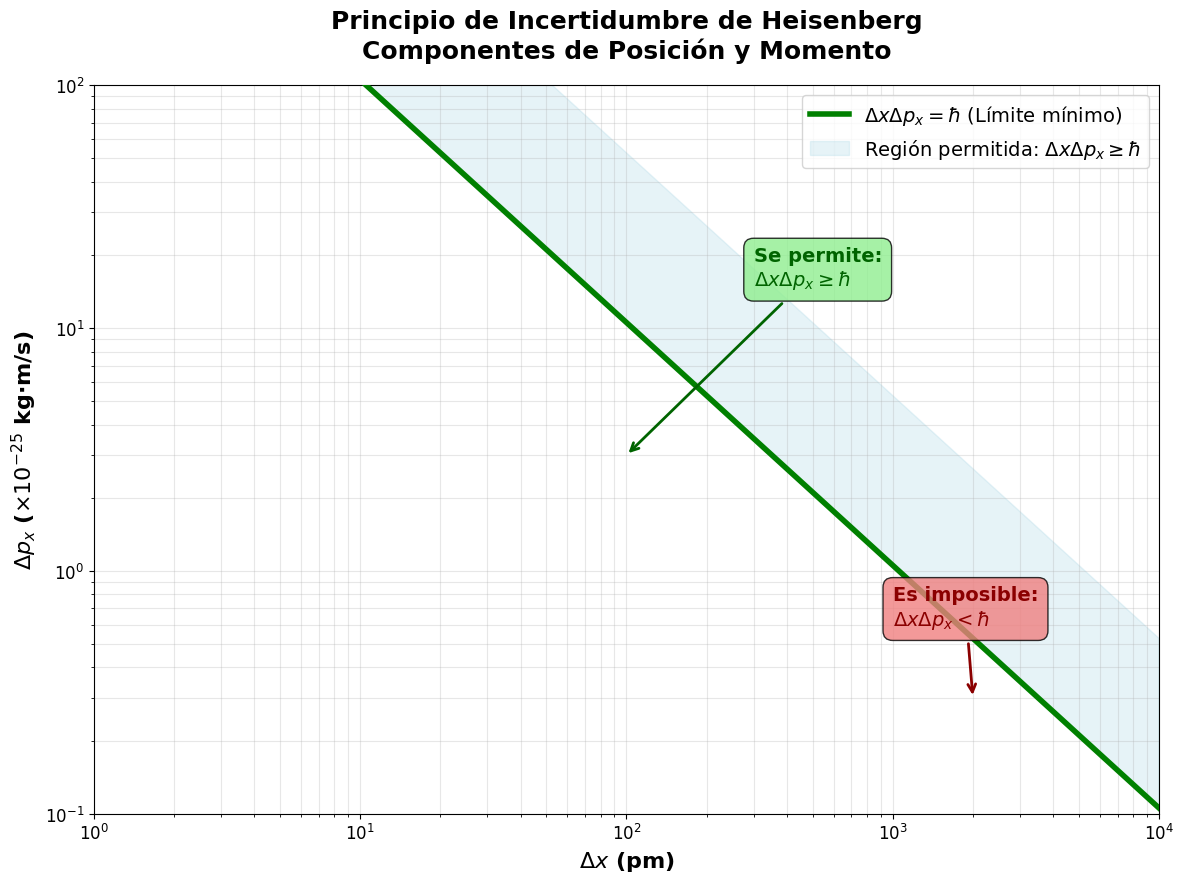

In [5]:
quick_graph()